In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.drop(['Ad Topic Line','City','Country'],axis=1,inplace=True)

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


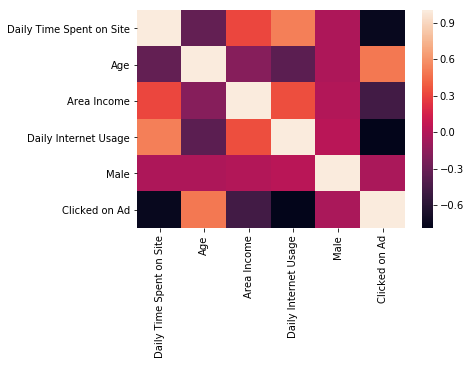

In [7]:
sns.heatmap(df.corr())

In [8]:
df.drop('Male',axis=1,inplace=True)

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,2016-06-03 03:36:18,0


In [10]:
type(df['Timestamp'])

pandas.core.series.Series

In [11]:
df.drop('Timestamp',inplace=True,axis=1)

In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


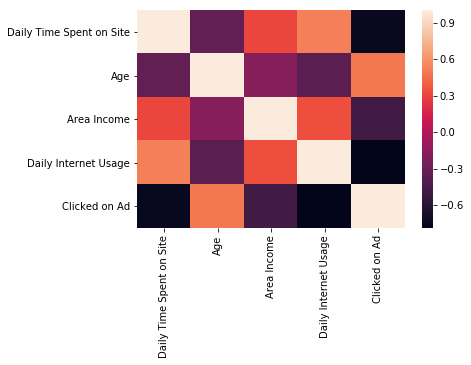

In [13]:
sns.heatmap(df.corr())

In [14]:
df.mean()

Daily Time Spent on Site       65.00020
Age                            36.00900
Area Income                 55000.00008
Daily Internet Usage          180.00010
Clicked on Ad                   0.50000
dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [20]:
scaled_data = ss.fit_transform(df.drop('Clicked on Ad',axis=1))

F:\mandar_soft\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\mandar_soft\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
X = pd.DataFrame(data = scaled_data, columns=df.columns[:-1])

In [22]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.249267,-0.114905,0.509691,1.734030
1,0.961132,-0.570425,1.002530,0.313805
2,0.282083,-1.139826,0.356949,1.287589
3,0.577432,-0.798185,-0.014456,1.501580
4,0.212664,-0.114905,1.408868,1.038731


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Clicked on Ad',axis=1),df['Clicked on Ad'],test_size=0.30)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
classifier = LogisticRegression()

In [27]:
classifier.fit(X_train,y_train)

F:\mandar_soft\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)

F:\mandar_soft\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


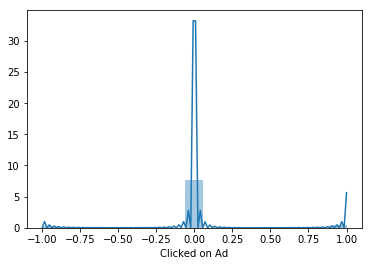

In [29]:
sns.distplot(y_test-y_pred)

In [30]:
len(y_pred)

300

In [31]:
len(y_test)

300